# Pandas

Werkzeug zur Datenanalyse
http://pandas.pydata.org/pandas-docs/stable/

In [1]:
import pandas as pd
import requests as req
import numpy as np
import matplotlib.pyplot as plt

## Datenstrukturen in Pandas

### Series

Eine Art eindimensionaler Array

In [2]:
ser = pd.Series(["a", "b", "c", "d", "e"])
print(ser)

0    a
1    b
2    c
3    d
4    e
dtype: object


Wie man sieht, ist automatisch ein Index dabei, der die Werte durchnummeriert.
Man kann auch einen eigenen Index angeben

In [3]:
ser = pd.Series(range(1, 6), index=["Eins", "Zwo", "Drei", "Vier", "Fünf"])
print(ser)

Eins    1
Zwo     2
Drei    3
Vier    4
Fünf    5
dtype: int64


Ansonsten funktioniert Series ziemlich ähnlich wie ein Numpy-Array

In [4]:
print(ser[ser >= 3])
print(ser[:3])

Drei    3
Vier    4
Fünf    5
dtype: int64
Eins    1
Zwo     2
Drei    3
dtype: int64


Eine Series lässt sich auch mit einem Numpy-Array initialisieren, und kann direkt geplottet werden:

/scratch/kabbe/programs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


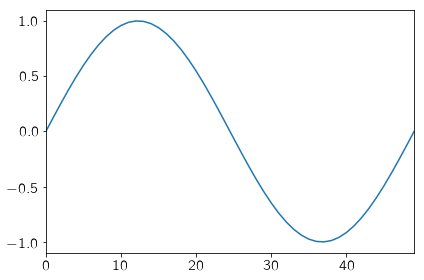

In [5]:
ser = pd.Series(np.linspace(0, 2 * np.pi))
sin = np.sin(ser)
sin.plot()
plt.show()

Wir können einer Series auch einen Namen geben:

In [6]:
ser = pd.Series(np.linspace(0, 2 * np.pi), name="x-Werte")
sin = np.sin(ser).rename("y-Werte")

print(ser.head())  # Zeige die ersten Werte
print(sin.head())

0    0.000000
1    0.128228
2    0.256457
3    0.384685
4    0.512913
Name: x-Werte, dtype: float64
0    0.000000
1    0.127877
2    0.253655
3    0.375267
4    0.490718
Name: y-Werte, dtype: float64


### DataFrame 

~ zweidimensionaler Array, bzw. Tabelle

In [7]:
wetter = pd.DataFrame({"Niederschlag (mm/h)": [5.0, 1.3, 2.3, 4.4],
                       "Temperatur": [10.3, 8.3, 2.2, 1.0]})
wetter

,Niederschlag (mm/h),Temperatur
0,5.0,10.3
1,1.3,8.3
2,2.3,2.2
3,4.4,1.0


Auf eine einzelne Spalte kann man folgendermaßen zugreifen:

In [8]:
print(wetter["Niederschlag (mm/h)"])  # so..
print(wetter.Temperatur)  # oder so

0    5.0
1    1.3
2    2.3
3    4.4
Name: Niederschlag (mm/h), dtype: float64
0    10.3
1     8.3
2     2.2
3     1.0
Name: Temperatur, dtype: float64


Dabei ist allerdings zu beachten, dass die Punktnotation nur funktioniert, solange keine
Leerzeichen im Spaltennamen enthalten sind

Wir können auch neue Spalten hinzufügen...

In [9]:
wetter["Niederschlagsdauer (h)"] = [0.4, 1.5, 3.2, 2.0]
wetter

,Niederschlag (mm/h),Temperatur,Niederschlagsdauer (h)
0,5.0,10.3,0.4
1,1.3,8.3,1.5
2,2.3,2.2,3.2
3,4.4,1.0,2.0


.. und wieder entfernen

In [10]:
del wetter["Niederschlagsdauer (h)"]
wetter

,Niederschlag (mm/h),Temperatur
0,5.0,10.3
1,1.3,8.3
2,2.3,2.2
3,4.4,1.0


Wenn wir eine neue Spalte an einer bestimmten Stelle einfügen wollen:

In [11]:
wetter.insert(1, "Niederschlagsdauer (h)", [1, 2, 3, 4])
wetter

,Niederschlag (mm/h),Niederschlagsdauer (h),Temperatur
0,5.0,1,10.3
1,1.3,2,8.3
2,2.3,3,2.2
3,4.4,4,1.0


Ebenso können wir neue Spalten erstellen, die sich aus bestehenden Spalten ableiten:

In [12]:
wetter.assign(Niederschlag_total = wetter["Niederschlag (mm/h)"] * wetter["Niederschlagsdauer (h)"])

,Niederschlag (mm/h),Niederschlagsdauer (h),Temperatur,Niederschlag_total
0,5.0,1,10.3,5.0
1,1.3,2,8.3,2.6
2,2.3,3,2.2,6.9
3,4.4,4,1.0,17.6


In [13]:
def celsius_to_kelvin(dataframe):
    return dataframe.Temperatur + 273.15

wetter.assign(temp_kelvin = celsius_to_kelvin)

,Niederschlag (mm/h),Niederschlagsdauer (h),Temperatur,temp_kelvin
0,5.0,1,10.3,283.45
1,1.3,2,8.3,281.45
2,2.3,3,2.2,275.35
3,4.4,4,1.0,274.15


Dabei ändert sich der ursprüngliche Dataframe allerdings nicht!
Jede Änderung müssen wir daher wieder in einer Variablen speichern, sonst geht sie verloren

In [14]:
wetter

,Niederschlag (mm/h),Niederschlagsdauer (h),Temperatur
0,5.0,1,10.3
1,1.3,2,8.3
2,2.3,3,2.2
3,4.4,4,1.0


## GroupBy

In [15]:
df = pd.DataFrame({"Spalte 1": np.random.randint(20, size=30),
                   "Spalte 2": np.random.random(size=30),
                   "Spalte 3": list(10 * "abc")})
df.head()

,Spalte 1,Spalte 2,Spalte 3
0,15,0.009180,a
1,10,0.064741,b
2,19,0.597941,c
3,7,0.854147,a
4,14,0.245169,b


Spalte 3 gibt für jede Zeile eine Kategorie an, die a, b, oder c ist.
Mithilfe von groupby ist es nun möglich, die Daten nach diesen drei Kategorien zu sortieren und zusammenzufassen.

Beispiel: wir gruppieren die Tabelle nach den Kategorien in Spalte 3 und lassen uns Durchschnittswerte jeder Kategorie 
          ausgeben

In [16]:
df.groupby("Spalte 3").mean()

,Spalte 1,Spalte 2
Spalte 3,,
a,11.6,0.399782
b,10.2,0.478534
c,11.8,0.447932
